In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./cleaned/CleanedSubmissions.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyID         1506 non-null   object 
 1   Company           1506 non-null   object 
 2   2019 Volume       1011 non-null   float64
 3   2020 Volume       1080 non-null   float64
 4   2021 Volume       1101 non-null   float64
 5   2022 Volume       1337 non-null   float64
 6   2023 Volume       1506 non-null   int64  
 7   2019 Sides        1011 non-null   float64
 8   2020 Sides        1080 non-null   float64
 9   2021 Sides        1101 non-null   float64
 10  2022 Sides        1337 non-null   float64
 11  2023 Sides        1506 non-null   int64  
 12  City              1506 non-null   object 
 13  State             1506 non-null   object 
 14  Country Code      1506 non-null   object 
 15  Referral Network  1506 non-null   object 
 16  Logo              1503 non-null   object 


In [3]:
df.describe()

,2019 Volume,2020 Volume,2021 Volume,2022 Volume,2023 Volume,2019 Sides,2020 Sides,2021 Sides,2022 Sides,2023 Sides,Avg Home Price
count,"1,011.00","1,080.00","1,101.00","1,337.00","1,506.00","1,011.00","1,080.00","1,101.00","1,337.00","1,506.00","1,506.00"
mean,"1,364,890,296.02","1,606,023,607.40","2,170,319,473.85","1,749,984,392.06","1,365,653,401.24","3,677.20","3,982.03","4,501.05","3,460.99","2,696.57","498,588.01"
std,"7,623,001,011.09","9,072,109,424.39","13,100,298,878.08","10,929,915,541.44","8,520,899,956.79","16,003.51","17,515.13","21,380.90","17,756.25","14,116.40","439,824.88"
min,"64,467,142.00","69,112,988.00","69,534,513.00","6,754,137.00","801,000.00",500.00,504.00,505.00,13.00,1.00,"118,991.00"
25%,"245,599,806.00","282,904,006.75","349,773,613.00","310,729,624.85","247,425,719.25",963.00,"1,005.00","1,086.00",840.50,649.50,"293,098.00"
50%,"440,619,533.00","513,100,143.00","655,422,593.00","539,796,331.34","439,614,739.50","1,538.00","1,559.00","1,664.00","1,304.00","1,032.00","392,388.00"
75%,"933,366,129.50","1,071,965,214.75","1,353,661,980.00","1,095,259,837.00","868,818,813.25","2,860.00","2,995.75","3,197.00","2,427.00","1,899.75","556,690.75"
max,"170,000,000,000.00","185,000,000,000.00","251,000,000,000.00","227,977,362,940.00","184,452,364,253.00","329,680.00","343,220.00","388,098.00","397,138.00","355,052.00","8,212,756.00"


In [4]:
df = (
pd.DataFrame({
    'company_id': df['CompanyID'].to_list() * 5,
    'company': df['Company'].to_list() * 5,
    'volume': df['2019 Volume'].to_list() + df['2020 Volume'].to_list() + df['2021 Volume'].to_list() + df['2022 Volume'].to_list() + df['2023 Volume'].to_list(),
    'sides': df['2019 Sides'].to_list() + df['2020 Sides'].to_list() + df['2021 Sides'].to_list() + df['2022 Sides'].to_list() + df['2023 Sides'].to_list(),
    'referrer': df['Referral Network'].to_list() * 5,
    'year': [2019] * len(df['2019 Volume']) + [2020] * len(df['2020 Volume']) + [2021] * len(df['2021 Volume']) + [2022] * len(df['2022 Volume']) + [2023] * len(df['2023 Volume']) ,
    'city': df['City'].to_list() * 5,
    'state': df['State'].to_list() * 5, 
    'country': df['Country Code'].to_list() * 5, 
    'logo': df['Logo'].to_list() * 5
})
)
# billions
df['volume'] = df.volume / 1000000000
# millions
df['sides'] = df.sides / 1000000

In [5]:
df.head()

,company_id,company,volume,sides,referrer,year,city,state,country,logo
0,reczKnazN8kUWC7Ia,Seven Gables Real Estate,NaN,NaN,LeadingRE,2019,Tustin,CA,US,7.png (https://v5.airtableusercontent.com/v3/u...
1,recn0HaY78aRYlVnf,"Stark Real Estate Operations, LLC",0.71,0.00,LeadingRE,2019,Ficthburg,WI,US,Stark_Logo__Real_People_Tagline.jpg (https://v...
2,recR8yxovQcfGnqBc,Keller Williams Main Line,NaN,NaN,Keller Williams,2019,Ardmore,PA,US,kellerwilliams_prim_logo_pms200.png (https://v...
3,reccrsQM3YrT1nMgO,Keller Williams Success Realty,1.21,0.00,Keller Williams,2019,South Ogden,UT,US,kellerwilliams_prim_logo_pms200.png (https://v...
4,recsWmbo7T6v00rYa,CENTURY 21 North East,1.23,0.00,CENTURY 21,2019,Peabody,MA,US,38V3SivORu6asYe0CMAi (https://v5.airtableuserc...


In [6]:
df['volume_ranking'] = df.groupby(['year'])['volume'].rank(ascending=False)
df['pct_volume'] = df['volume'] / df.groupby('year')['volume'].transform('sum')
df['sides_ranking'] = df.groupby(['year'])['sides'].rank(ascending=False)
df['pct_sides'] = df['sides'] / df.groupby('year')['sides'].transform('sum')
df

,company_id,company,volume,sides,referrer,year,city,state,country,logo,volume_ranking,pct_volume,sides_ranking,pct_sides
0,reczKnazN8kUWC7Ia,Seven Gables Real Estate,NaN,NaN,LeadingRE,2019,Tustin,CA,US,7.png (https://v5.airtableusercontent.com/v3/u...,NaN,NaN,NaN,NaN
1,recn0HaY78aRYlVnf,"Stark Real Estate Operations, LLC",0.71,0.00,LeadingRE,2019,Ficthburg,WI,US,Stark_Logo__Real_People_Tagline.jpg (https://v...,332.00,0.00,298.00,0.00
2,recR8yxovQcfGnqBc,Keller Williams Main Line,NaN,NaN,Keller Williams,2019,Ardmore,PA,US,kellerwilliams_prim_logo_pms200.png (https://v...,NaN,NaN,NaN,NaN
3,reccrsQM3YrT1nMgO,Keller Williams Success Realty,1.21,0.00,Keller Williams,2019,South Ogden,UT,US,kellerwilliams_prim_logo_pms200.png (https://v...,190.00,0.00,179.00,0.00
4,recsWmbo7T6v00rYa,CENTURY 21 North East,1.23,0.00,CENTURY 21,2019,Peabody,MA,US,38V3SivORu6asYe0CMAi (https://v5.airtableuserc...,186.00,0.00,210.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,recsaET9TOnpTdUo2,RE/MAX Victory + Affiliates,0.38,0.00,RE/MAX,2023,Beavercreek,OH,US,remax_logo (1).png (https://v5.airtableusercon...,860.00,0.00,513.00,0.00
7526,recXPNlNcArOkH07v,RE/MAX Boone Realty,0.40,0.00,RE/MAX,2023,Columbia,MO,US,9zzEelRSTXqk1lYzuN0J (https://v5.airtableuserc...,806.00,0.00,518.00,0.00
7527,recfhN2sXBlhbLrB8,Levi Rodgers Real Estate,0.34,0.00,Independent/Other,2023,San Antonio,TX,US,Full_color_trans.png (https://v5.airtableuserc...,925.00,0.00,733.50,0.00
7528,recjfaNGwehRz3OQ0,Keller Williams Realty Baz Investments,0.29,0.00,Keller Williams,2023,Oak Lawn,IL,US,kellerwilliams_prim_logo_pms200.png (https://v...,"1,031.00",0.00,"1,003.00",0.00


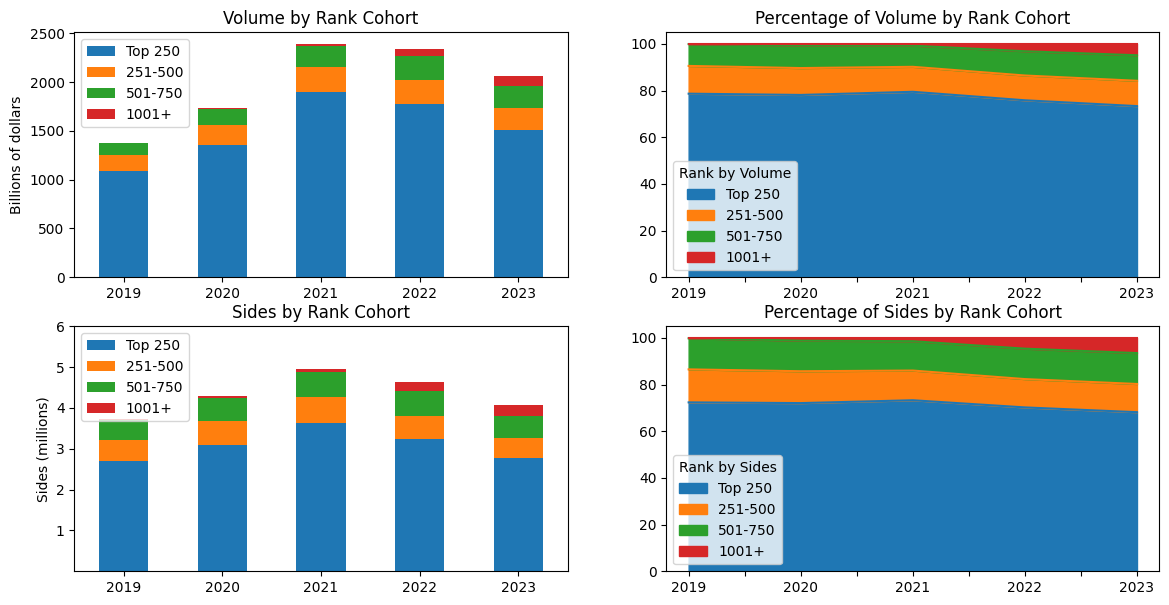

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=True)
fig.set_figwidth(14)
fig.set_figheight(7)

# binned volume
df['volume_bin'] = ['Top 250' if x <=250 else '251-500' if x <= 500 else '501-750' if x <= 1000 else '1001+' for x in df.volume_ranking]
binned = df[['year','volume_bin','volume']].groupby(['year', 'volume_bin']).sum().reset_index().pivot(
                index='year', columns='volume_bin', values='volume'
            )
binned.index = binned.index.astype('str')
binned.columns.name = 'Rank by Volume'
binned[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='bar', stacked=True, title='Volume by Rank Cohort', xlabel='', ylabel='Billions of dollars', rot=0,
    ax=axes[0,0]).legend(loc='upper left')

# binned volume percentages
binned_percs = df[['year', 'volume_bin', 'pct_volume']].groupby(['year', 'volume_bin']).sum().reset_index().pivot(
                    index='year', columns='volume_bin', values='pct_volume'
                )
binned_percs.index = binned_percs.index.astype('str')
binned_percs.columns.name = 'Rank by Volume'
binned_percs = binned_percs * 100
binned_percs[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='area', stacked=True, title='Percentage of Volume by Rank Cohort', xlabel='', ylabel='',
    ax=axes[0,1])

# binned sides
df['sides_bin'] = ['Top 250' if x <=250 else '251-500' if x <= 500 else '501-750' if x <= 1000 else '1001+' for x in df.sides_ranking]
binned_sides = df[['year','sides_bin','sides']].groupby(['year', 'sides_bin']).sum().reset_index().pivot(
                index='year', columns='sides_bin', values='sides'
            )
binned_sides.index = binned_sides.index.astype('str')
binned_sides.columns.name = 'Rank by Sides'
binned_sides[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='bar', stacked=True, title='Sides by Rank Cohort', xlabel='', ylabel='Sides (millions)', rot=0,  yticks=list(range(1,7)),
    ax=axes[1,0]).legend(loc='upper left')

# binned volume percentages
binned_sides_percs = df[['year', 'sides_bin', 'pct_sides']].groupby(['year', 'sides_bin']).sum().reset_index().pivot(
                    index='year', columns='sides_bin', values='pct_sides'
                )
binned_sides_percs.index = binned_sides_percs.index.astype('str')
binned_sides_percs.columns.name = 'Rank by Sides'
binned_sides_percs = binned_sides_percs * 100
binned_sides_percs[['Top 250', '251-500', '501-750', '1001+']].plot(
    kind='area', stacked=True, title='Percentage of Sides by Rank Cohort', xlabel='', ylabel='',
    ax=axes[1,1])

_ = plt.show()

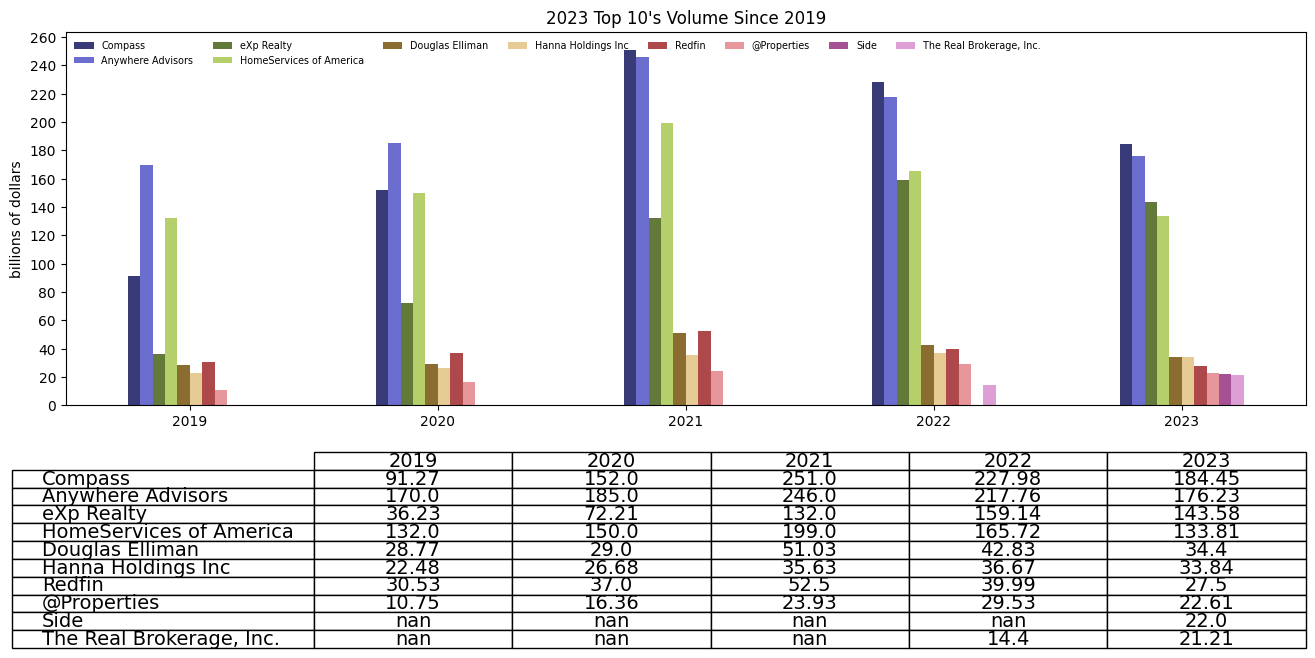

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, gridspec_kw = {'height_ratios':[2,1]})
# fig.set_figwidth(12)
# fig.set_figheight(6)

vol_top_2023 = df.loc[(df.year==2023)&(df.volume_ranking<11), 'company'].to_list()
path_to_top10 = df.loc[df.company.isin(vol_top_2023), ['year', 'company', 'volume']].pivot(
                    index='year', columns='company', values='volume'
                )
path_to_top10.index = path_to_top10.index.astype('str')
col_order = path_to_top10.T.sort_values(by='2023', ascending=False).index.to_list()
path_to_top10 = path_to_top10[col_order]
# path_to_top10.sort_values(by='2023', inplace=True)
path_to_top10 = round(path_to_top10, 2)
_ = path_to_top10.plot(figsize=(16,8), cmap='tab20b', kind='bar', rot=0,
        yticks=list(range(0,280,20)), xlabel='', title='2023 Top 10\'s Volume Since 2019',
        ylabel='billions of dollars',
        ax=axes[0])
_.legend(loc='upper left',
         fontsize='x-small',
        #  bbox_to_anchor=(0.5, 0., 0.5, 0.5),
         ncols= 8,
         frameon=False
         )
axes[1].axis('off')
# axes[1].figure.set_figheight(8)
table = (pd.plotting.table(axes[1], path_to_top10.T.sort_values(by='2023', ascending=False), loc='center', cellLoc='center',
                           # x shift, y shift, text box width, text box height
                          bbox=[0.2, 0, 0.8, 1.05]
                          )
        )
table.auto_set_font_size(False)
table.set_fontsize(14)


In [9]:
df.head()

,company_id,company,volume,sides,referrer,year,city,state,country,logo,volume_ranking,pct_volume,sides_ranking,pct_sides,volume_bin,sides_bin
0,reczKnazN8kUWC7Ia,Seven Gables Real Estate,NaN,NaN,LeadingRE,2019,Tustin,CA,US,7.png (https://v5.airtableusercontent.com/v3/u...,NaN,NaN,NaN,NaN,1001+,1001+
1,recn0HaY78aRYlVnf,"Stark Real Estate Operations, LLC",0.71,0.00,LeadingRE,2019,Ficthburg,WI,US,Stark_Logo__Real_People_Tagline.jpg (https://v...,332.00,0.00,298.00,0.00,251-500,251-500
2,recR8yxovQcfGnqBc,Keller Williams Main Line,NaN,NaN,Keller Williams,2019,Ardmore,PA,US,kellerwilliams_prim_logo_pms200.png (https://v...,NaN,NaN,NaN,NaN,1001+,1001+
3,reccrsQM3YrT1nMgO,Keller Williams Success Realty,1.21,0.00,Keller Williams,2019,South Ogden,UT,US,kellerwilliams_prim_logo_pms200.png (https://v...,190.00,0.00,179.00,0.00,Top 250,Top 250
4,recsWmbo7T6v00rYa,CENTURY 21 North East,1.23,0.00,CENTURY 21,2019,Peabody,MA,US,38V3SivORu6asYe0CMAi (https://v5.airtableuserc...,186.00,0.00,210.00,0.00,Top 250,Top 250


In [10]:
sorted(df.referrer.unique())

['Berkshire Hathaway HomeServices',
 'Berkshire Hathaway HomeServices,LeadingRE',
 'Better Homes and Gardens',
 'CENTURY 21',
 'CENTURY 21,Coldwell Banker',
 "CENTURY 21,Sotheby's International Realty,Coldwell Banker",
 'Coldwell Banker',
 "Coldwell Banker,Corcoran,Sotheby's International Realty",
 'Corcoran',
 'ERA',
 'EXIT Realty',
 'Engel & Völkers',
 'HomeSmart',
 'Independent/Other',
 'JPAR',
 'Keller Williams',
 'LeadingRE',
 'NextHome',
 'RE/MAX',
 'Realty Executives',
 'Realty ONE Group',
 "Sotheby's International Realty",
 'United Real Estate']

In [11]:
df.loc[df.year==2023, ['referrer', 'volume']].groupby('referrer').sum().sort_values(by='volume', ascending=False)

,volume
referrer,
Independent/Other,605.08
Keller Williams,376.20
LeadingRE,217.61
"Coldwell Banker,Corcoran,Sotheby's International Realty",176.23
RE/MAX,156.59
"Berkshire Hathaway HomeServices,LeadingRE",133.81
Sotheby's International Realty,93.35
Coldwell Banker,61.29
Berkshire Hathaway HomeServices,53.81


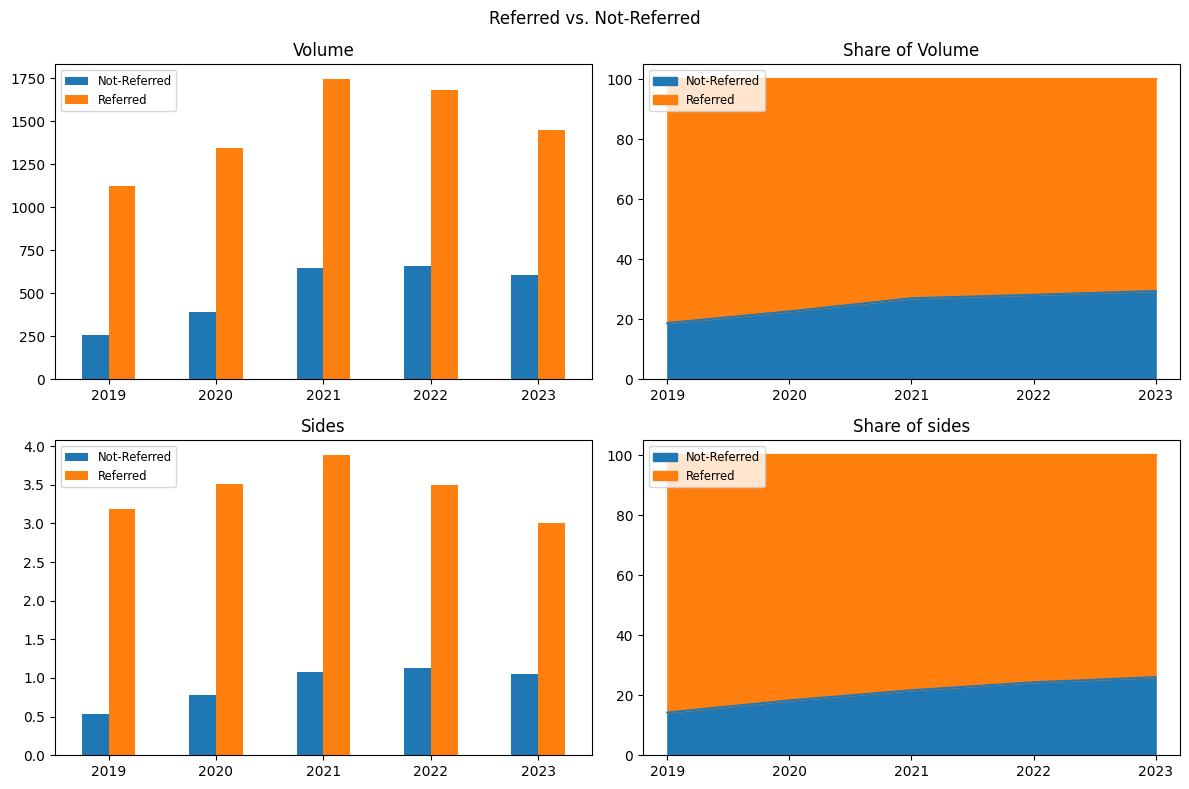

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(12)
fig.set_tight_layout(tight=True)
fig.suptitle('Referred vs. Not-Referred')

byReferrer = df[['year','referrer', 'volume']].groupby(['year', 'referrer']).sum().sort_values(by=['year', 'volume'], ascending=[True, False])
byReferrer.reset_index(inplace=True)
byReferrer['referred'] = ['Not-Referred' if x == 'Independent/Other' else 'Referred' for x in byReferrer.referrer]
byReferrer = byReferrer.drop(columns='referrer').groupby(['year', 'referred']).sum().reset_index().pivot(index='year', columns='referred', values='volume')
byReferrer.plot.bar(ax=ax[0, 0], rot=0, xlabel='', title='Volume').legend(fontsize='small', title=None, loc='upper left')

byReferrer['total'] = byReferrer['Not-Referred'] + byReferrer['Referred']
byReferrer['Not-Referred'] = byReferrer['Not-Referred'] / byReferrer.total * 100
byReferrer['Referred'] = byReferrer['Referred'] / byReferrer.total * 100
byReferrer.drop(columns='total', inplace=True)
byReferrer.plot(kind='area', stacked=True, xticks=list(range(2019, 2024)), xlabel='', ax=ax[0, 1], title='Share of Volume').legend(fontsize='small', title=None, loc='upper left')

byReferrer = df[['year','referrer', 'sides']].groupby(['year', 'referrer']).sum().sort_values(by=['year', 'sides'], ascending=[True, False])
byReferrer.reset_index(inplace=True)
byReferrer['referred'] = ['Not-Referred' if x == 'Independent/Other' else 'Referred' for x in byReferrer.referrer]
byReferrer = byReferrer.drop(columns='referrer').groupby(['year', 'referred']).sum().reset_index().pivot(index='year', columns='referred', values='sides')
byReferrer.plot.bar(ax=ax[1, 0], rot=0, xlabel='', title='Sides').legend(fontsize='small', title=None, loc='upper left')

byReferrer['total'] = byReferrer['Not-Referred'] + byReferrer['Referred']
byReferrer['Not-Referred'] = byReferrer['Not-Referred'] / byReferrer.total * 100
byReferrer['Referred'] = byReferrer['Referred'] / byReferrer.total * 100
byReferrer.drop(columns='total', inplace=True)
byReferrer.plot(kind='area', stacked=True, xticks=list(range(2019, 2024)), xlabel='', ax=ax[1, 1], title='Share of sides').legend(fontsize='small', title=None, loc='upper left')

plt.show()

In [13]:
referred = df.loc[df.referrer!='Independent/Other', ['year','referrer', 'volume', 'sides']].groupby(['year', 'referrer']).sum().sort_values(by=['year', 'volume'], ascending=[True, False])
referred.reset_index(inplace=True)

In [14]:
referred.loc[referred.year==2023]

,year,referrer,volume,sides
88,2023,Keller Williams,376.20,0.88
89,2023,LeadingRE,217.61,0.42
90,2023,"Coldwell Banker,Corcoran,Sotheby's Internation...",176.23,0.25
91,2023,RE/MAX,156.59,0.40
92,2023,"Berkshire Hathaway HomeServices,LeadingRE",133.81,0.24
93,2023,Sotheby's International Realty,93.35,0.09
94,2023,Coldwell Banker,61.29,0.15
95,2023,Berkshire Hathaway HomeServices,53.81,0.13
96,2023,CENTURY 21,41.92,0.11
97,2023,HomeSmart,29.18,0.06


In [15]:
### Multiple Brands
# undo billions
df['volume'] = df.volume * 1000000000
# undo millions
df['sides'] = df.sides * 1000000

hsa = df.copy().loc[(df.year==2023)&(df.company=='HomeServices of America'), ['company_id', 'company', 'referrer', 'volume', 'sides']]
hsa['referrer'] = [x.split(',') for x in hsa.referrer]
hsa = hsa.explode('referrer').reset_index(drop=True)
hsa.loc[hsa.referrer=='Berkshire Hathaway HomeServices', 'volume'] = 55598689740 
hsa.loc[hsa.referrer=='Berkshire Hathaway HomeServices', 'sides'] = 90533 
hsa.loc[hsa.referrer=='LeadingRE', 'volume'] = 77495317918 
hsa.loc[hsa.referrer=='LeadingRE', 'sides'] = 143645 
# add Indy
hsa = pd.concat([hsa, pd.DataFrame({'company_id': [hsa.company_id.min()],
                              'company': [hsa.company.min()],
                              'referrer': ['Other'],
                              'volume': [712707712 ],
                              'sides': [1683 ]})], ignore_index=True)

tomlinson = df.copy().loc[(df.year==2023)&(df.company.str.contains('Tomlinson')), ['company_id', 'company', 'referrer', 'volume', 'sides']]
tomlinson['referrer'] = [x.split(',') for x in tomlinson.referrer]
tomlinson = tomlinson.explode('referrer').reset_index(drop=True)
tomlinson.loc[tomlinson.referrer=='CENTURY 21', 'volume'] = 568810771 
tomlinson.loc[tomlinson.referrer=='CENTURY 21', 'sides'] = 833 
tomlinson.loc[tomlinson.referrer=='Coldwell Banker', 'volume'] = 1478825889 
tomlinson.loc[tomlinson.referrer=='Coldwell Banker', 'sides'] = 3302 
tomlinson.loc[tomlinson.referrer=='Sotheby\'s International Realty', 'volume'] = 959482647 
tomlinson.loc[tomlinson.referrer=='Sotheby\'s International Realty', 'sides'] = 1007 

hrc = df.copy().loc[(df.year==2023)&(df.company.str.contains('HRC')), ['company_id', 'company', 'referrer', 'volume', 'sides']]
hrc['referrer'] = [x.split(',') for x in hrc.referrer]
hrc = hrc.explode('referrer').reset_index(drop=True)
hrc.loc[hrc.referrer=='CENTURY 21', 'volume'] = 517245607 
hrc.loc[hrc.referrer=='CENTURY 21', 'sides'] = 1575 
hrc.loc[hrc.referrer=='Coldwell Banker', 'volume'] = 333213199 
hrc.loc[hrc.referrer=='Coldwell Banker', 'sides'] = 1555 

anywhere = df.copy().loc[(df.year==2023)&(df.company.str.contains('Anywhere Advisors')), ['company_id', 'company', 'referrer', 'volume', 'sides']]
anywhere['referrer'] = [x.split(',') for x in anywhere.referrer]
anywhere = anywhere.explode('referrer').reset_index(drop=True)
anywhere.loc[anywhere.referrer=='Coldwell Banker', 'volume'] = 143003776000 
anywhere.loc[anywhere.referrer=='Coldwell Banker', 'sides'] = 234969 
anywhere.loc[anywhere.referrer=='Corcoran', 'volume'] = 15306481000 
anywhere.loc[anywhere.referrer=='Corcoran', 'sides'] = 7375 
anywhere.loc[anywhere.referrer=='Sotheby\'s International Realty', 'volume'] = 17919208000 
anywhere.loc[anywhere.referrer=='Sotheby\'s International Realty', 'sides'] = 9679 

multis = pd.concat([hsa, tomlinson, hrc, anywhere], ignore_index=True)

In [16]:
top_referrers = pd.concat([multis, 
                    df.loc[(df.year==2023)&(df.referrer!='Independent/Other')&(~df.company.isin(multis.company.unique())), 
                            ['company_id', 'referrer', 'volume', 'sides']]]).groupby('referrer').agg({
                                'company_id':'nunique',
                                'volume':'sum',
                                'sides':'sum'
                            }).sort_values(by='volume', ascending=False)
top_referrers['volume'] = top_referrers['volume'].astype('int64')
top_referrers['sides'] = top_referrers['sides'].astype('int64')
top_referrers.iloc[:-1,:]

,company_id,volume,sides
referrer,,,
Keller Williams,541,376196557807,879860
LeadingRE,99,295107823071,565765
Coldwell Banker,81,206105016432,393167
RE/MAX,311,156589560927,397503
Sotheby's International Realty,49,112232997374,97487
Berkshire Hathaway HomeServices,59,109411819256,219185
CENTURY 21,72,43010389766,113479
HomeSmart,22,29180135951,61801
Realty ONE Group,39,24875361091,63997


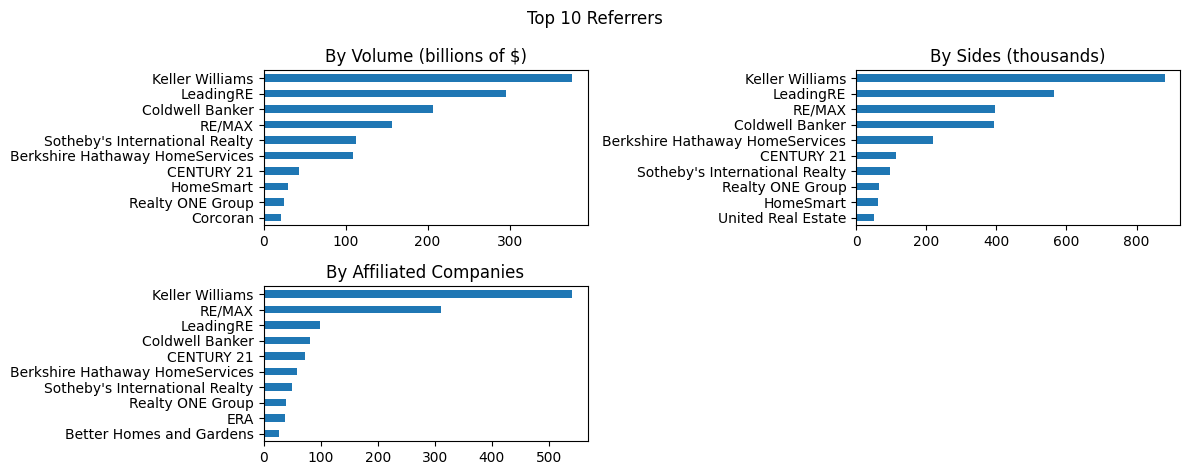

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_tight_layout(tight=True)
fig.suptitle('Top 10 Referrers')
fig.set_figwidth(12)

top_referrers.sort_values(by='volume').iloc[-10:,:].div(1000000000).plot.barh(y='volume', legend=None, title='By Volume (billions of $)', ylabel='', ax=ax[0,0])

top_referrers.sort_values(by='sides').iloc[-10:,:].div(1000).plot.barh(y='sides', legend=None, title='By Sides (thousands)', ylabel='', ax=ax[0,1])

top_referrers.sort_values(by='company_id').iloc[-10:,:].plot.barh(y='company_id', legend=None, title='By Affiliated Companies', ylabel='', ax=ax[1,0])

ax[1,1].axis('off')

plt.show()

In [18]:
top_referrers['vol_per_co'] = top_referrers['volume'] / top_referrers['company_id']
top_referrers.sort_values(by='vol_per_co', ascending=False)

,company_id,volume,sides,vol_per_co
referrer,,,,
Corcoran,7,21020511954,13205,"3,002,930,279.14"
LeadingRE,99,295107823071,565765,"2,980,887,101.73"
Coldwell Banker,81,206105016432,393167,"2,544,506,375.70"
Sotheby's International Realty,49,112232997374,97487,"2,290,469,334.16"
United Real Estate,11,20432401149,52274,"1,857,491,013.55"
Berkshire Hathaway HomeServices,59,109411819256,219185,"1,854,437,614.51"
HomeSmart,22,29180135951,61801,"1,326,369,815.95"
Engel & Völkers,7,7615961687,9268,"1,087,994,526.71"
Realty Executives,10,10808728729,28855,"1,080,872,872.90"


In [19]:
top_referrers['sides_per_co'] = top_referrers['sides'] / top_referrers['company_id']
top_referrers.sort_values(by='sides_per_co', ascending=False)

,company_id,volume,sides,vol_per_co,sides_per_co
referrer,,,,,
LeadingRE,99,295107823071,565765,"2,980,887,101.73","5,714.80"
Coldwell Banker,81,206105016432,393167,"2,544,506,375.70","4,853.91"
United Real Estate,11,20432401149,52274,"1,857,491,013.55","4,752.18"
Berkshire Hathaway HomeServices,59,109411819256,219185,"1,854,437,614.51","3,715.00"
Realty Executives,10,10808728729,28855,"1,080,872,872.90","2,885.50"
HomeSmart,22,29180135951,61801,"1,326,369,815.95","2,809.14"
Sotheby's International Realty,49,112232997374,97487,"2,290,469,334.16","1,989.53"
Corcoran,7,21020511954,13205,"3,002,930,279.14","1,886.43"
Other,1,712707712,1683,"712,707,712.00","1,683.00"


States

In [20]:
### states are just where headquarters are

byState2023 = df.loc[(df.year==2023)&(df.country=='US'), ['company_id', 'company', 'volume', 'state']]
# byState2023['pct_volume'] = byState2023['volume'] / byState2023.groupby('state')['volume'].transform('sum') * 100
### "Arizona" in column of state codes needs to be changed to "AZ"
byState2023.loc[byState2023.state=='Arizona', 'state'] = 'AZ'
###
# byState2023['state_rank'] = byState2023.groupby('state')['volume'].rank(ascending=False)

byState2023[['state', 'company', 'volume']].sort_values(by='volume', ascending=False).head(50)

,state,company,volume
6579,NY,Compass,"184,452,364,253.00"
6629,NJ,Anywhere Advisors,"176,229,465,000.00"
6469,WA,eXp Realty,"143,578,492,940.00"
6733,MN,HomeServices of America,"133,806,715,370.00"
6463,NY,Douglas Elliman,"34,402,289,102.00"
6448,PA,Hanna Holdings Inc,"33,840,285,248.00"
7291,WA,Redfin,"27,496,757,995.00"
6178,IL,@Properties,"22,610,457,904.00"
7186,CA,Side,"22,002,550,227.00"
6199,FL,"The Real Brokerage, Inc.","21,207,562,972.00"
